# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import os
import joblib

In [8]:
path = os.path.join(os.getcwd(), 'data', 'movie_review.csv')

data = pd.read_csv(path)

# Data Wrangling

In [9]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [11]:
data.isna().sum()

text     0
label    0
dtype: int64

In [12]:
data.duplicated().sum()

277

In [13]:
data[data.duplicated(keep=False)].sort_values(by=data.columns.tolist())

,text,label
202,"""Go Fish"" garnered Rose Troche rightly or wron...",0
39214,"""Go Fish"" garnered Rose Troche rightly or wron...",0
14788,"""Three"" is a seriously dumb shipwreck movie. M...",0
20957,"""Three"" is a seriously dumb shipwreck movie. M...",0
23393,"""Witchery"" might just be the most incoherent a...",0
...,...,...
18082,this movie begins with an ordinary funeral... ...,0
2908,this movie sucks. did anyone notice that the e...,0
34939,this movie sucks. did anyone notice that the e...,0
5842,"well, the writing was very sloppy, the directi...",0


In [14]:
data = data.drop_duplicates()

In [15]:
import json
# Convert to dictionary
data_dict = {
    "texts": data["text"].tolist(),
    "Labels": data["label"].tolist()
}

with open("movie_review.json", "w", encoding="utf-8") as json_file:
    json.dump(data_dict, json_file, ensure_ascii=False, indent=4)


In [16]:
print(data['text'][5000],data['label'][5000])

I was an usherette in an old theater in Northern California when this movie came out. As good as it is on DVD, it's even more eerie and terrifying on the big screen. Although it has been about 9 years since I have seen it, it is still one of my all-time favorites. At the risk of sounding trite, "They just don't make 'em like this anymore!" If Sixth Sense freaked you out at all, this movie is definitely for you! Great storyline, incredible cast of characters, ominous setting; even the soundtrack has a haunting quality to it. I highly recommend you not watch it alone. What a brownstone apartment was renting for in 1977 alone, will have you gasping (it would be at least 10-times that price today). 1


# EDA

In [17]:
data.describe()

,label
count,39723.000000
mean,0.501171
std,0.500005
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [18]:
data['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

C:\Users\diask\AppData\Local\Temp\ipykernel_15296\2813318363.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['postive','negative'])


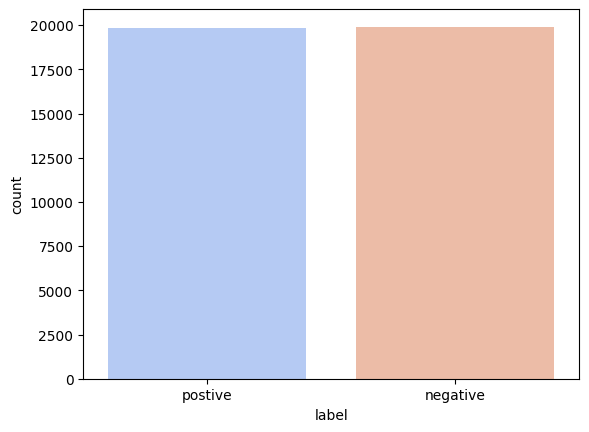

In [19]:
#plot the labels
ax = sns.countplot(data = data,x=data['label'],hue=data['label'],palette='coolwarm')
ax.set_xticklabels(['postive','negative'])
ax.legend_.remove()
plt.show()

# Base model using count vectorizer

In [20]:
#split the data
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [21]:
vect = CountVectorizer(stop_words='english',max_features = 50000)
rf = RandomForestClassifier(n_estimators=250,random_state=7,max_depth=40,min_samples_split=10)

pipe = Pipeline(
    [('vectorizer',vect),
     ('RandomForestClassifier',rf)]
    )

In [22]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=50000, stop_words='english')),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=40, min_samples_split=10,
                                        n_estimators=250, random_state=7))])

In [23]:
#evaluate the model
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8595342983008182

In [24]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3963
           1       0.85      0.88      0.86      3982

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945



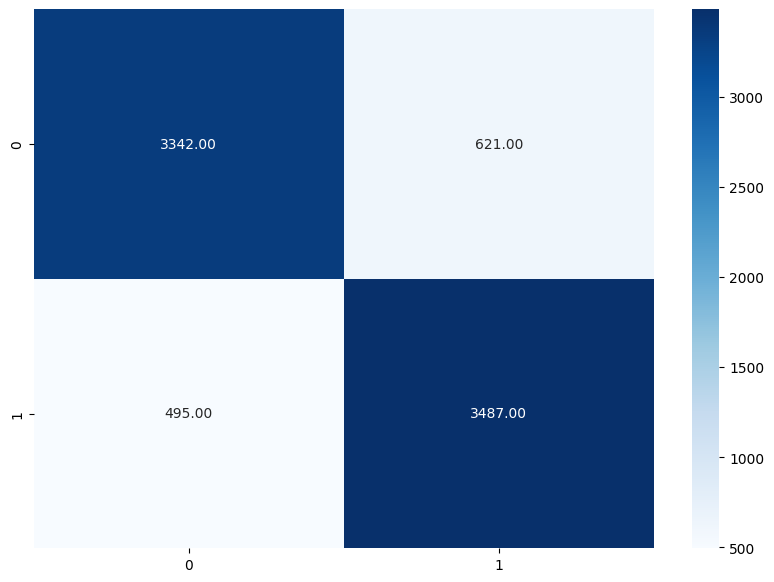

In [25]:
#plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='Blues')
plt.show()

# Model with Tf-IDF vectorizer

In [81]:
vect = TfidfVectorizer(max_features=50000,min_df=0.1,max_df=0.9,analyzer='char_wb',ngram_range=(3,5))
rf = RandomForestClassifier(n_estimators=101,random_state=7,min_samples_split=10,max_depth = 20)

pipe = Pipeline(
    [('vectorizer',vect),
     ('RandomForestClassifier',rf)]
    )

In [82]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.9,
                                 max_features=50000, min_df=0.1,
                                 ngram_range=(3, 5))),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=20, min_samples_split=10,
                                        n_estimators=101, random_state=7))])

In [83]:
#evaluate the model
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.7913152926368785

In [84]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3963
           1       0.78      0.81      0.80      3982

    accuracy                           0.79      7945
   macro avg       0.79      0.79      0.79      7945
weighted avg       0.79      0.79      0.79      7945



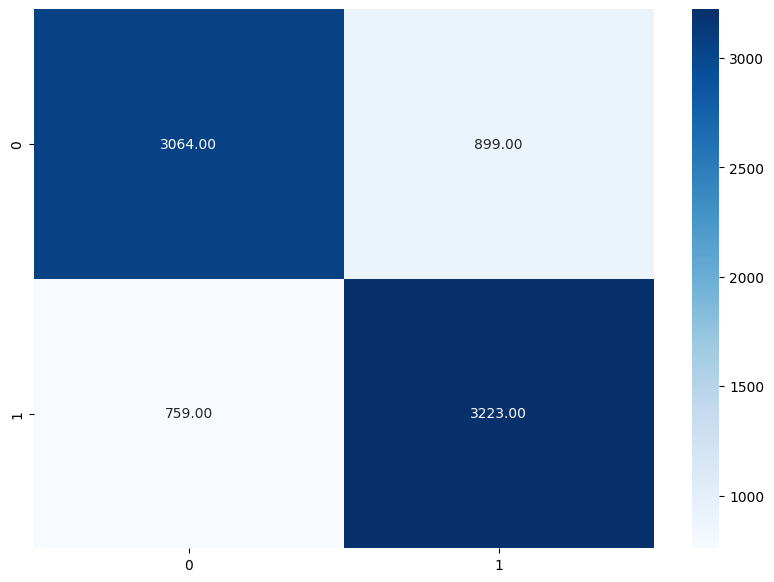

In [85]:
#plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='Blues')
plt.show()